## Import Libraries

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import os
import matplotlib as mpl
from PIL import Image
from palettable.cmocean.sequential import Deep_20
deep = mcolors.ListedColormap(Deep_20.mpl_colors)
import glob
from matplotlib import colors
from matplotlib.colors import LogNorm
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import TwoSlopeNorm
# from matplotlib.colors import DivergingNorm
import h5py
from matplotlib.lines import Line2D

/home/cneumaie/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
style = "/home/cneumaie/Scripts/Styles/christine-paperlight_small.mpstyle"

plt.style.use(style)
from matplotlib import rcParams

###Figure Settings
# -- Fonts --
rcParams['font.size'] = 10

Duplicate key in file '/home/cneumaie/Scripts/Styles/christine-paperlight_small.mpstyle', line 15 ("xtick.color: 'k'")
Duplicate key in file '/home/cneumaie/Scripts/Styles/christine-paperlight_small.mpstyle', line 16 ("ytick.color: 'k'")
Duplicate key in file '/home/cneumaie/Scripts/Styles/christine-paperlight_small.mpstyle', line 27 ('axes.edgecolor:222222')


In [3]:
alt = np.array([  -25,    25,    75,   125,   175,   225,   275,   325,   375,
         425,   475,   525,   575,   625,   675,   725,   775,   825,
         875,   925,   975,  1025,  1075,  1125,  1175,  1225,  1275,
        1325,  1375,  1425,  1475,  1525,  1575,  1625,  1675,  1725,
        1775,  1825,  1875,  1925,  1975,  2025,  2075,  2125,  2175,
        2225,  2275,  2325,  2375,  2425,  2475,  2525,  2575,  2625,
        2675,  2725,  2775,  2825,  2875,  2925,  2975,  3025,  3075,
        3125,  3175,  3225,  3275,  3325,  3375,  3425,  3475,  3525,
        3575,  3625,  3675,  3725,  3775,  3825,  3875,  3925,  3975,
        4025,  4077,  4129,  4183,  4237,  4293,  4349,  4407,  4467,
        4527,  4589,  4651,  4715,  4781,  4847,  4915,  4985,  5055,
        5127,  5201,  5276,  5352,  5430,  5510,  5591,  5674,  5758,
        5844,  5932,  6022,  6114,  6207,  6302,  6399,  6498,  6599,
        6702,  6807,  6914,  7023,  7134,  7248,  7364,  7483,  7604,
        7727,  7852,  7980,  8111,  8244,  8380,  8519,  8660,  8805,
        8952,  9103,  9256,  9413,  9572,  9735,  9900, 10069, 10242,
       10418, 10597, 10780, 10967, 11156, 11350, 11549, 11749, 11949,
       12149, 12349, 12549, 12749, 12949, 13149, 13349])

alt = alt[:99]

In [4]:
def calc_theta_rho(ds, count):
    '''Calculates density potential temperature'''
    if count == 0:
        ds2 = ds.assign(theta_rho = ds.THP *((1-ds.RTP)+(1.61*ds.RV) ))
    else:
        ds2 = ds.assign(theta_rho = ds.THETA *((1-ds.RTP)+(1.61*ds.RV) ))
    
    return ds2

## Get files for Figure 1 g-h)

In [5]:
filePaths = sorted(glob.glob(f"/moonbow/cneumaie/CP_train_derecho/processed/*"))
temp_list = [5,10,20]
time_list = [30,60,90, 120]
wind_list = ['placeholder', 'u0']
thv_mean_dataset = np.zeros((2,3,3,4,50,99,2998))
u_dataset = np.zeros((2,3,3,4,50,99,2998))
v_dataset = np.zeros((2,3,3,4,50,99,2998))
w_dataset = np.zeros((2,3,3,4,50,99,2998))
for filePath in filePaths:
    outfilename = filePath
    if "30" in outfilename:
        cp2_start = 8
    elif "60" in outfilename:
        cp2_start = 14
    elif "90" in outfilename:
        cp2_start = 20
    elif "120" in outfilename:
        cp2_start = 26 

    ###Loop through all variations and perform depth and environment calculations for the case that matches the filePath
    for w,wind in enumerate(wind_list):
        for c,CP1_temp in enumerate(temp_list):
            for k,CP2_temp in enumerate(temp_list):
                for t,time in enumerate(time_list):
                    if f"CP1_{CP1_temp}_CP2_{CP2_temp}_{time:03}_{wind}" in filePath:
                        outfilename2 = f"./Scripts/cpfile_edges_v7/cpfile_CP1_{CP1_temp}k_CP2_{CP2_temp}k_{time:03}min_{wind}_v2.h5"
                        outfilename = filePath
                        rams_data = xr.open_dataset(outfilename)
                        rams_data2 = calc_theta_rho(rams_data, 1)
                        thv_mean = rams_data2["theta_rho"]
                        uc = rams_data2["UC"]
                        vc = rams_data2["VC"]
                        wc = rams_data2["WC"]
                        rams_data.close()
                        rams_data2.close()
                        thv_mean_dataset[w,c,k,t,:len(thv_mean)] = thv_mean
                        u_dataset[w,c,k,t,:len(uc)] = uc
                        v_dataset[w,c,k,t,:len(vc)] = vc
                        w_dataset[w,c,k,t,:len(wc)] = wc
                        

In [6]:
style = "/home/cneumaie/Scripts/Styles/christine-paperlight_small.mpstyle"

plt.style.use(style)
from matplotlib import rcParams

###Figure Settings
# -- Fonts --
rcParams['font.size'] = 10

Duplicate key in file '/home/cneumaie/Scripts/Styles/christine-paperlight_small.mpstyle', line 15 ("xtick.color: 'k'")
Duplicate key in file '/home/cneumaie/Scripts/Styles/christine-paperlight_small.mpstyle', line 16 ("ytick.color: 'k'")
Duplicate key in file '/home/cneumaie/Scripts/Styles/christine-paperlight_small.mpstyle', line 27 ('axes.edgecolor:222222')


## Plot Figure 1 j)

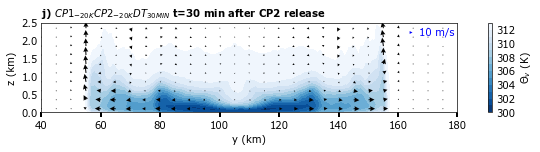

In [7]:
w = 1
c = 2
k =2 
t = 0
fig = plt.figure(figsize = (7.4,2.0), constrained_layout = True)
plt.subplot(111)

thv_plotted = thv_mean_dataset[w,c,k,t]
y = np.arange(1,2999)
skipz = 5
skipy = 50
yy, zz = np.meshgrid(y,alt)
c1 = plt.contourf(y,alt[1:99],thv_plotted[12,1:], cmap = 'Blues_r',levels = np.arange(300,314,1))
q = plt.quiver(yy[3::skipz,::skipy], zz[3::skipz,::skipy], v_dataset[w,c,k,t,12,3::skipz,::skipy], w_dataset[w,c,k,t,12,3::skipz, ::skipy]*5
               , scale=300,scale_units='height',headwidth = 5,facecolor = 'black')

plt.quiverkey(q,0.89, 0.9,U=10,label='10 m/s',labelpos='E', labelcolor = "blue", color = "blue")

plt.ylim(25,2500)
plt.xlim(400,1800)
plt.xticks(np.arange(400,1801,200), labels = np.arange(40,181,20))
plt.yticks(np.arange(25,2526,500), labels = np.arange(0,2.51,0.5))
plt.xlabel("y (km)")
plt.ylabel("z (km)")
plt.title(r"j) $CP1_{-20K}CP2_{-20K}DT_{30MIN}$ t=30 min after CP2 release", loc = "left", fontsize = 10)


plt.colorbar(c1, label = r"$\Theta_{v}$ (K)")

# plt.savefig("Fig1_j_v6.jpg", dpi = 300, bbox_inches = "tight")
plt.show()

plt.close()
